In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import sys
from segment_anything import sam_model_registry, SamPredictor


def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))



sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint_h = r"C:\Users\katri\University\Semester 1\Projekt\Files\sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint_h)
sam.to(device=device)

predictor = SamPredictor(sam)

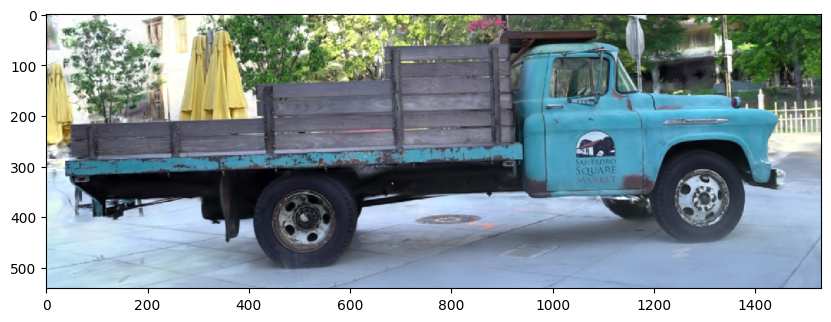

In [8]:
path = r"C:\Users\katri\Pictures\Work\Truck.png"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# FOR DEBUGING - Plot to show the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

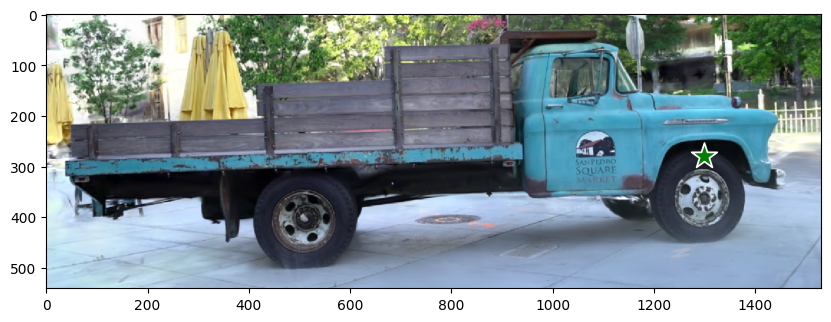

In [12]:
predictor.set_image(image)
pointValueX, pointValueY = 1300, 280

input_point = np.array([[pointValueX, pointValueY]])
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

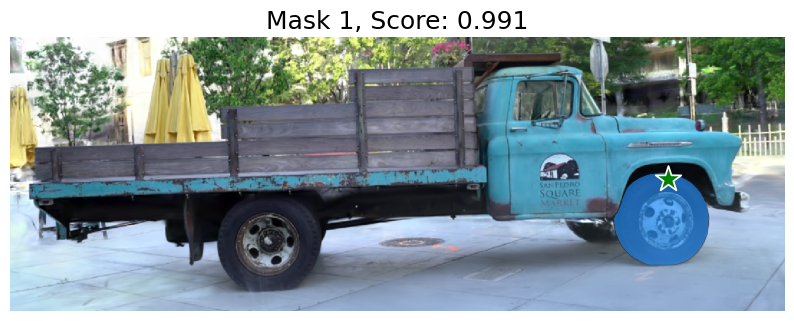

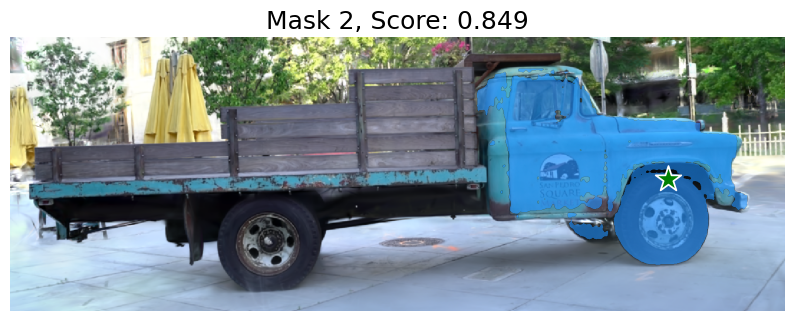

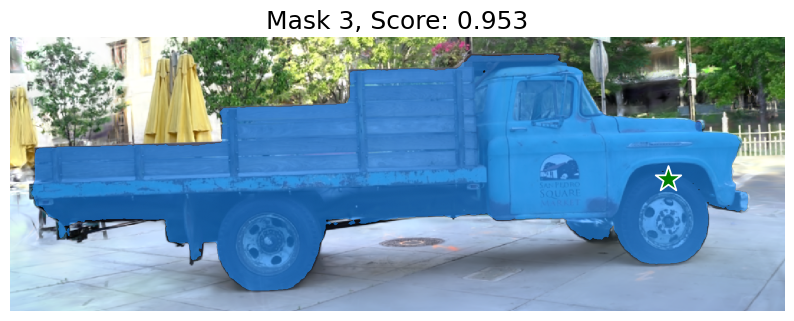

In [13]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

masks.shape  # (number_of_masks) x H x W


for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

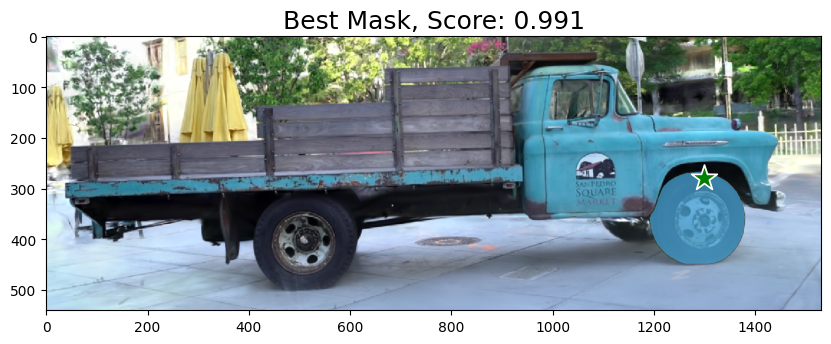

In [14]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

best_mask_index = np.argmax(scores)
best_mask = masks[best_mask_index]

overlay = image.copy()
overlay[best_mask > 0] = [255, 255, 0]
overlayedImage = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)

plt.figure(figsize=(10,10))
plt.imshow(overlayedImage)  # show the image with overlay
show_mask(best_mask, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.title(f"Best Mask, Score: {scores[best_mask_index]:.3f}", fontsize=18)
plt.axis('on')
plt.show()